# Práctica 2: Modelo cinemático inverso de un  y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| ----------- |
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Que son las transformaciones homogéneas?

>Son operaciones matemáticas que permiten representar rotaciones, traslaciones, y escalados en el espacio tridimensional de manera unificada. Una transformación homogénea se representa mediante matrices homogéneas, matrices que incluyen tanto las rotaciones como las traslaciones en una sola operación. Esto permite realizar múltiples transformaciones consecutivas simplemente multiplicando matrices, lo cual es muy eficiente para cálculos computacionales.

- ¿Que nos permite obtener el modelo de cinemática inversa de un manipulador?

>Permite calcular las posiciones, ángulos, o configuraciones necesarias de las articulaciones del robot para que su extremo (manipuladores, o el centro de masa de un robot móvil o herramienta) alcance una posición y orientación específicas en el espacio de trabajo. En otras palabras, dado un objetivo en el espacio (la posición y orientación deseada del extremo), la cinemática inversa determina cómo debe moverse cada articulación para lograr esa posición final.

- ¿De que formas se puede interpolar la trayectoria de un efector final entre dos puntos?

>La elección de la interpolación depende de:

>Tipo de tarea

>Limitaciones del robot

>Tiempo de procesamiento

>algunos tipos son:

>Interpolación Lineal (Línea Recta).

>El efector final se mueve en línea recta desde el punto inicial hasta el punto final, manteniendo constante la velocidad en la dirección de movimiento, es útil cuando se requiere precisión, como en tareas de ensamblaje o en procesos de soldadura.Para lograr esta interpolación en el espacio cartesiano, se calcula la posición del efector final a lo largo de la línea en incrementos discretos.

>Interpolación Polinómica

>Se utiliza un polinomio para definir la trayectoria, como un polinomio de tercer o quinto grado, permite un movimiento más suave que la interpolación lineal, ya que se pueden controlar las condiciones iniciales y finales de posición, velocidad y aceleración. Los polinomios de grado 3 son comunes, ya que permiten controlar la posición y velocidad inicial y final, mientras que los de grado 5 permiten además controlar la aceleración inicial y final.

>Interpolación en el Espacio Articular

>En lugar de definir una trayectoria cartesiana, se interpolan directamente los valores de las articulaciones del robot, la trayectoria del efector final en el espacio cartesiano dependerá de la configuración del robot y no necesariamente será una línea recta entre los puntos.

>Interpolación por Splines

>Se utilizan curvas splines, como B-splines o splines cúbicos, para interpolar la trayectoria, permiten definir trayectorias suaves y continuas que pueden pasar por varios puntos intermedios, lo que es ideal para trayectorias complejas. Ofrecen un control preciso sobre la suavidad y continuidad de la trayectoria, lo cual es útil en aplicaciones donde se necesita evitar cambios bruscos de dirección.

>Interpolación Circular o Arcos

>Se define una trayectoria en forma de arco o círculo entre los puntos inicial y final, es útil en aplicaciones que requieren un movimiento curvo o circular, como en corte de materiales o en tareas de pintura. Para este tipo de interpolación se definen el radio, el centro del arco y los puntos de inicio y fin de la trayectoria.


- ¿Qué es git?

>Es un sistema de control de versiones, creado para gestionar y rastrear los cambios en el código fuente de proyectos de software, aunque también puede usarse para otros tipos de archivos. Presenta una arquitectura distribuida, es un ejemplo de DVCS (sistema de control de versiones distribuido, por sus siglas en inglés). En lugar de tener un único espacio para todo el historial de versiones del software, en Git, la copia de trabajo del código de cada desarrollador es también un repositorio que puede albergar el historial completo de todos los cambios.
Además de contar con una arquitectura distribuida, Git se ha diseñado teniendo en cuenta el rendimiento, la seguridad y la flexibilidad.

- ¿Qué es github?

>Es una plataforma de desarrollo colaborativo que aloja proyectos en la nube utilizando el sistema de control de versiones llamado Git. Ayuda a los desarrolladores a almacenar y administrar el código llevando un registro de cambios. Generalmente el código es abierto, lo que permite realizar proyectos compartidos y mantener el seguimiento detallado de su progreso. También funciona como red social conectando a los desarrolladores con los usuarios. Como usuario puedes descargar programas o aplicaciones, y de la misma manera puedes aportar a su desarrollo ofreciendo mejoras y discutir las cuestiones que te interesan en foros temáticos.
El trabajo colaborativo, una de las características fundamentales de GitHub, es posible gracias al software de código abierto Git, en el que se basa GitHub.

En caso de integrar imagenes, colocarlas en la carpeta *"imagenes"*

## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/P2_IM1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>



In [ ]:
#CODIGO COMPLETO PASADO DE .PY a Jupyter Notebook

In [147]:
###Colocar y correr el código dentro de estas celdas
from sympy import solve, Symbol, Matrix, cos, sin, simplify, pi, diff, symbols


dim = (0.3, 0.3, 0.3)
base_dim = (0, 0, 0.1)
base_rot = (pi/2, 0, 0)

    #Parámetros de dimensiones
dim = dim
base_dim = base_dim
base_rot = base_rot
    #Variables para cinemática directa
theta_O_1 = Symbol('theta_O_1')
theta_1_2 = Symbol('theta_1_2')
theta_2_3 = Symbol('theta_2_3')
    #Grados de libertad
x_O_P = Symbol('x_O_P')
z_O_P = Symbol('y_O_P')
theta_O_P = Symbol('theta_O_P')
    #Velocidades
x_O_P_dot = Symbol('x_O_P_dot')
z_O_P_dot = Symbol('y_O_P_dot')
theta_O_P_dot = Symbol('theta_O_P_dot')

def trans_homo(x, y, z, roll, pitch, yaw):
    # Matriz de rotación combinada
    R = Matrix([
        [cos(yaw)*cos(pitch), cos(yaw)*sin(pitch)*sin(roll) - sin(yaw)*cos(roll), cos(yaw)*sin(pitch)*cos(roll) + sin(yaw)*sin(roll)],
        [sin(yaw)*cos(pitch), sin(yaw)*sin(pitch)*sin(roll) + cos(yaw)*cos(roll), sin(yaw)*sin(pitch)*cos(roll) - cos(yaw)*sin(roll)],
        [-sin(pitch),         cos(pitch)*sin(roll),                            cos(pitch)*cos(roll)]
    ])
    
    # Matriz de transformación homogénea
    T = Matrix([
        [R[0,0], R[0,1], R[0,2], x],
        [R[1,0], R[1,1], R[1,2], y],
        [R[2,0], R[2,1], R[2,2], z],
        [0,      0,      0,      1]
    ])
    return T
    #Transformaciones homogéneas
T_O_O = trans_homo(base_dim[0], base_dim[1], base_dim[2], base_rot[0], base_rot[1], base_rot[2])
T_O_1 = trans_homo(0, 0, 0, 0, 0, theta_O_1)
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
T_O_P = simplify(T_O_O*T_O_1 * T_1_2 * T_2_3 * T_3_P)
# Imprimir componentes de T_O_P
#print("GDL del robot")
#print(T_O_P[0, 3])
#print(T_O_P[1, 3])
#print(T_O_P[2, 3])

# Calcular xi_O_P como una matriz
xi_O_P = Matrix([
    T_O_P[0, 3],
    T_O_P[2, 3],
    theta_O_1 + theta_1_2 + theta_2_3
])

# Calcular la matriz Jacobiana J
J = Matrix.hstack(
    diff(xi_O_P, theta_O_1),
    diff(xi_O_P, theta_1_2),
    diff(xi_O_P, theta_2_3)
)

# Inversa de la matriz Jacobiana
J_inv = J.inv()

# Definición de la función trans_homo
def trans_homo(x, y, z, gamma, beta, alpha):
    T = Matrix([
        [cos(alpha)*cos(beta), -sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma), x],
        [sin(alpha)*cos(beta), sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha), y],
        [-sin(beta), sin(gamma)*cos(beta), cos(beta)*cos(gamma), z],
        [0, 0, 0, 1]
    ])
    return T

# Función para generar la trayectoria polinomial
def polinomial_trayectory_generator(frec=20, time=(0, 3), gdl_in=(0.8, 0.1, 0), gdl_fn=(0.4, 0.4, 0)):
    a_0, a_1, a_2, a_3, a_4, a_5, t = symbols('a_0 a_1 a_2 a_3 a_4 a_5 t')
    lam = a_0 + a_1*t + a_2*(t**2) + a_3*(t**3) + a_4*(t**4) + a_5*(t**5)
    lam_dot = diff(lam, t)
    lam_dot_dot = diff(lam_dot, t)
    
    # Resolviendo los términos del polinomio con condiciones iniciales y finales
    terms = solve([
        lam.subs(t, time[0]) - gdl_in[0],
        lam.subs(t, time[1]) - gdl_fn[0],
        lam_dot.subs(t, time[0]) - 0,
        lam_dot.subs(t, time[1]) - 0,
        lam_dot_dot.subs(t, time[0]) - 0,
        lam_dot_dot.subs(t, time[1]) - 0
    ], [a_0, a_1, a_2, a_3, a_4, a_5], dict=True)
    
    # Lambda con valores sustituidos
    lam_s = lam.subs(terms[0])
    lam_s_dot = lam_dot.subs(terms[0])
    lam_s_dot_dot = lam_dot_dot.subs(terms[0])
    samples = int(frec * (time[1] - time[0]) + 1)
    dt = 1.0 / frec
    # Creación de arreglos para guardar los GDL
    gdl = []
    gdl_dot = []
    gdl_dot_dot = []
    for a in range(samples):
        gdl.append = (gdl_in[0] + lam_s.subs(t, time[0] + float(a) / frec) * (gdl_fn[0] - gdl_in[0]),
               gdl_in[1] + lam_s.subs(t, time[0] + float(a) / frec) * (gdl_fn[1] - gdl_in[1]),
               gdl_in[2] + lam_s.subs(t, time[0] + float(a) / frec) * (gdl_fn[2] - gdl_in[2]))
        gdl_dot.append = (lam_s_dot.subst(t, time[0] + float(a) / frec)  * (gdl_fn[0] - gdl_in[0]),
               lam_s_dot.subs(t, time[0] + float(a) / frec) * (gdl_fn[1] - gdl_in[1]),
               lam_s_dot.subs(t, time[0] + float(a) / frec) * (gdl_fn[2] - gdl_in[2]))
        gdl_dot_dot.append = (lam_s_dot_dot.subs(t, time[0] + float(a) / frec)  * (gdl_fn[0] - gdl_in[0]),
               lam_s_dot_dot.subs(t, time[0] + float(a) / frec) * floar(gdl_fn[1] - gdl_in[1]),
               lam_s_dot_dot.subs(t, time[0] + float(a) / frec) * (gdl_fn[2] - gdl_in[2]))
    #obteniendo la posicion inical del ws
    xi_desp = xi_O_P - Matrix([gdl_in[0], 
                               gdl_in[1], 
                               gdl_in[2]]
                              )
    q_in_def = (0.585685543457151, -1.17137108691430, 0.585685543457151)
    #obteniendo la velocidad inical del ws
    xi_O_P_dot = xi_O_P - Matrix([x_O_P_dot, 
                               z_O_P_dot, 
                               theta_O_P_dot
                                ])
    # Arreglos para guardar las posiciones de ws
    ws = []
    ws_dot = []
    ws_dot_dot = []
    #agregando la posicion inicial
    ws.append(q_in_def)
    # Velocidad inicial
    q_dot_in = q_O_P_dot.subs({
        x_O_P_dot: gdl_dot[0][0],
        z_O_P_dot: gdl_dot[0][1],
        theta_O_P_dot: gdl_dot[0][2],
        theta_O_1: ws[0][0],
        theta_1_2: ws[0][1],
        theta_2_3: ws[0][2]
    })
    ws_dot.append(q_dot_in)

    # Cálculo de todos los valores por cinemática inversa
    for a in range(samples - 1):
        # Posición
        pos_ws = (ws[a][0] + ws_dot[a][0] * dt,
                  ws[a][1] + ws_dot[a][1] * dt,
                  ws[a][2] + ws_dot[a][2] * dt)

        # Velocidad
        q_dot_iter = q_O_P_dot.subs({
            x_O_P_dot: gdl_dot[a + 1][0],
            z_O_P_dot: gdl_dot[a + 1][1],
            theta_O_P_dot: gdl_dot[a + 1][2],
            theta_O_1: ws[a + 1][0],
            theta_1_2: ws[a + 1][1],
            theta_2_3: ws[a + 1][2]
        })
        ws_dot.append(q_dot_iter)

        # Aceleración
        acc_ws = ((ws_dot[a + 1][0] - ws_dot[a][0]) / dt,
                  (ws_dot[a + 1][1] - ws_dot[a][1]) / dt,
                  (ws_dot[a + 1][2] - ws_dot[a][2]) / dt)
        print("Iteración:" + str(a))
        #Aceleracion final
        ws_dot_dot.append((0,0,0))
        gdl = gdl
        gdl_dot = gdl_dot
        gdl_dot_dot = gdl_dot_dot
        ws = ws
        ws_dot = ws_dot
        ws_dot_dot = ws_dot_dot
def trayectory_graphics(self):
    # Grados de libertad (GDL)
    gdl_t = []
    gdl_p_0, gdl_p_1, gdl_p_2 = [], [], []
    gdl_v_0, gdl_v_1, gdl_v_2 = [], [], []
    gdl_a_0, gdl_a_1, gdl_a_2 = [], [], []
    
    # Espacio de trabajo (WS)
    ws_t = []
    ws_p_0, ws_p_1, ws_p_2 = [], [], []
    ws_v_0, ws_v_1, ws_v_2 = [], [], []
    ws_a_0, ws_a_1, ws_a_2 = [], [], []

    for i in range(len(gdl)):
        gdl_t.append(float(i) / frec)
        gdl_p_0.append(gdl[i][0])
        gdl_p_1.append(gdl[i][1])
        gdl_p_2.append(gdl[i][2])
        gdl_v_0.append(gdl_dot[i][0])
        gdl_v_1.append(gdl_dot[i][1])
        gdl_v_2.append(gdl_dot[i][2])
        gdl_a_0.append(gdl_dot_dot[i][0])
        gdl_a_1.append(gdl_dot_dot[i][1])
        gdl_a_2.append(gdl_dot_dot[i][2])

    for i in range(len(ws)):
        ws_t.append(float(i) / frec)
        ws_p_0.append(ws[i][0])
        ws_p_1.append(ws[i][1])
        ws_p_2.append(ws[i][2])
        ws_v_0.append(ws_dot[i][0])
        ws_v_1.append(ws_dot[i][1])
        ws_v_2.append(ws_dot[i][2])
        ws_a_0.append(ws_dot_dot[i][0])
        ws_a_1.append(ws_dot_dot[i][1])
        ws_a_2.append(ws_dot_dot[i][2])

    # Crear gráficos con subplots
    fig, ((gdl_plot, gdl_dot_plot, gdl_dot_dot_plot), 
          (ws_plot, ws_dot_plot, ws_dot_dot_plot)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))    
    
    # Gráficas de GDL
    gdl_plot.set_title("Posición GDL")
    gdl_plot.axis((0, 3, -1.5, 1.5))
    gdl_plot.plot(gdl_t, gdl_p_0, color="red")
    gdl_plot.plot(gdl_t, gdl_p_1, color="green")
    gdl_plot.plot(gdl_t, gdl_p_2, color="blue")

    gdl_dot_plot.set_title("Velocidad GDL")
    gdl_dot_plot.axis((0, 3, -0.6, 0.6))
    gdl_dot_plot.plot(gdl_t, gdl_v_0, color="red")
    gdl_dot_plot.plot(gdl_t, gdl_v_1, color="green")
    gdl_dot_plot.plot(gdl_t, gdl_v_2, color="blue")

    gdl_dot_dot_plot.set_title("Aceleración GDL")
    gdl_dot_dot_plot.axis((0, 3, -0.6, 0.6))
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_0, color="red")
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_1, color="green")
    gdl_dot_dot_plot.plot(gdl_t, gdl_a_2, color="blue")

    # Gráficas de WS
    ws_plot.set_title("Posición WS")
    ws_plot.axis((0, 3, -2.5, 2.5))
    ws_plot.plot(ws_t, ws_p_0, color="red")
    ws_plot.plot(ws_t, ws_p_1, color="green")
    ws_plot.plot(ws_t, ws_p_2, color="blue")

    ws_dot_plot.set_title("Velocidad WS")
    ws_dot_plot.axis((0, 3, -1.5, 1.5))
    ws_dot_plot.plot(ws_t, ws_v_0, color="red")
    ws_dot_plot.plot(ws_t, ws_v_1, color="green")
    ws_dot_plot.plot(ws_t, ws_v_2, color="blue")

    ws_dot_dot_plot.set_title("Aceleración WS")
    ws_dot_dot_plot.axis((0, 3, -1.5, 1.5))
    ws_dot_dot_plot.plot(ws_t, ws_a_0, color="red")
    ws_dot_dot_plot.plot(ws_t, ws_a_1, color="green")
    ws_dot_dot_plot.plot(ws_t, ws_a_2, color="blue")
    
    plt.tight_layout()
    plt.show()



In [ ]:
#CODIGO PARA TRANSFORMADAS HOMOGENEAS
from sympy import solve, Symbol, Matrix, cos, sin, simplify, pi, diff, symbols


dim = (0.3, 0.3, 0.3)
base_dim = (0, 0, 0.1)
base_rot = (pi/2, 0, 0)

    #Parámetros de dimensiones
dim = dim
base_dim = base_dim
base_rot = base_rot
    #Variables para cinemática directa
theta_O_1 = Symbol('theta_O_1')
theta_1_2 = Symbol('theta_1_2')
theta_2_3 = Symbol('theta_2_3')
    #Grados de libertad
x_O_P = Symbol('x_O_P')
z_O_P = Symbol('y_O_P')
theta_O_P = Symbol('theta_O_P')
    #Velocidades
x_O_P_dot = Symbol('x_O_P_dot')
z_O_P_dot = Symbol('y_O_P_dot')
theta_O_P_dot = Symbol('theta_O_P_dot')

def trans_homo(x, y, z, roll, pitch, yaw):
    # Matriz de rotación combinada
    R = Matrix([
        [cos(yaw)*cos(pitch), cos(yaw)*sin(pitch)*sin(roll) - sin(yaw)*cos(roll), cos(yaw)*sin(pitch)*cos(roll) + sin(yaw)*sin(roll)],
        [sin(yaw)*cos(pitch), sin(yaw)*sin(pitch)*sin(roll) + cos(yaw)*cos(roll), sin(yaw)*sin(pitch)*cos(roll) - cos(yaw)*sin(roll)],
        [-sin(pitch),         cos(pitch)*sin(roll),                            cos(pitch)*cos(roll)]
    ])
    
    # Matriz de transformación homogénea
    T = Matrix([
        [R[0,0], R[0,1], R[0,2], x],
        [R[1,0], R[1,1], R[1,2], y],
        [R[2,0], R[2,1], R[2,2], z],
        [0,      0,      0,      1]
    ])
    return T
    #Transformaciones homogéneas
T_O_O = trans_homo(base_dim[0], base_dim[1], base_dim[2], base_rot[0], base_rot[1], base_rot[2])
T_O_1 = trans_homo(0, 0, 0, 0, 0, theta_O_1)
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
T_O_P = simplify(T_O_O*T_O_1 * T_1_2 * T_2_3 * T_3_P)

In [136]:
#Primer transformada homogenea
T_0_1 = trans_homo(0, 0, 0, 0, 0, theta_O_1)
T_0_1

Matrix([
[cos(theta_O_1), -sin(theta_O_1), 0, 0],
[sin(theta_O_1),  cos(theta_O_1), 0, 0],
[             0,               0, 1, 0],
[             0,               0, 0, 1]])

In [56]:
#Primer transformada homogenea
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_1_2

Matrix([
[cos(theta_1_2), -sin(theta_1_2), 0, 0.3],
[sin(theta_1_2),  cos(theta_1_2), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

In [57]:
#Segunda Tranformada homogenea
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_1_2

Matrix([
[cos(theta_1_2), -sin(theta_1_2), 0, 0.3],
[sin(theta_1_2),  cos(theta_1_2), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

In [58]:
#tercera Tranformada homogenea
T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
T_2_3

Matrix([
[cos(theta_2_3), -sin(theta_2_3), 0, 0.3],
[sin(theta_2_3),  cos(theta_2_3), 0,   0],
[             0,               0, 1,   0],
[             0,               0, 0,   1]])

In [59]:
#CUarta Tranformada homogenea
T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
T_3_P

Matrix([
[1, 0, 0, 0.3],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

In [60]:
#MAtriz de transformacion
T_O_P = simplify(T_O_O*T_O_1 * T_1_2 * T_2_3 * T_3_P)
T_O_P

Matrix([
[cos(theta_1_2 + theta_2_3 + theta_O_1), -sin(theta_1_2 + theta_2_3 + theta_O_1),  0,       0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1)],
[                                     0,                                       0, -1,                                                                                                      0],
[sin(theta_1_2 + theta_2_3 + theta_O_1),  cos(theta_1_2 + theta_2_3 + theta_O_1),  0, 0.3*sin(theta_O_1) + 0.3*sin(theta_1_2 + theta_O_1) + 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1) + 0.1],
[                                     0,                                       0,  0,                                                                                                      1]])

In [100]:
#jocobiano
J

Matrix([
[-0.3*sin(theta_O_1) - 0.3*sin(theta_1_2 + theta_O_1) - 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1), -0.3*sin(theta_1_2 + theta_O_1) - 0.3*sin(theta_1_2 + theta_2_3 + theta_O_1), -0.3*sin(theta_1_2 + theta_2_3 + theta_O_1)],
[ 0.3*cos(theta_O_1) + 0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1),  0.3*cos(theta_1_2 + theta_O_1) + 0.3*cos(theta_1_2 + theta_2_3 + theta_O_1),  0.3*cos(theta_1_2 + theta_2_3 + theta_O_1)],
[                                                                                                1,                                                                            1,                                           1]])

In [101]:
#Jacobiano inverso
J_inv

Matrix([
[                                     3.33333333333333*cos(theta_1_2 + theta_O_1)/(-1.0*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + 1.0*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)),                                      3.33333333333333*sin(theta_1_2 + theta_O_1)/(-1.0*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + 1.0*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)),                                                                                                                        (-1.0*sin(theta_1_2 + theta_O_1)*cos(theta_1_2 + theta_2_3 + theta_O_1) + 1.0*sin(theta_1_2 + theta_2_3 + theta_O_1)*cos(theta_1_2 + theta_O_1))/(-1.0*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + 1.0*sin(theta_1_2 + theta_O_1)*cos(theta_O_1))],
[(-3.33333333333333*cos(theta_O_1) - 3.33333333333333*cos(theta_1_2 + theta_O_1))/(-1.0*sin(theta_O_1)*cos(theta_1_2 + theta_O_1) + 1.0*sin(theta_1_2 + theta_O_1)*cos(theta_O_1)), (-3.33333333333333*sin(theta_O_1) - 3.33333333333333*sin(theta_1_2 + theta_O_1))/(-1.0*si

### 2. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [ ]:
# Creación de arreglos para guardar los GDL
    gdl = []
    gdl_dot = []
    gdl_dot_dot = []
    for a in range(samples):
        gdl.append = (gdl_in[0] + lam_s.subs(t, time[0] + float(a) / frec) * (gdl_fn[0] - gdl_in[0]),
               gdl_in[1] + lam_s.subs(t, time[0] + float(a) / frec) * (gdl_fn[1] - gdl_in[1]),
               gdl_in[2] + lam_s.subs(t, time[0] + float(a) / frec) * (gdl_fn[2] - gdl_in[2]))
        gdl_dot.append = (lam_s_dot.subst(t, time[0] + float(a) / frec)  * (gdl_fn[0] - gdl_in[0]),
               lam_s_dot.subs(t, time[0] + float(a) / frec) * (gdl_fn[1] - gdl_in[1]),
               lam_s_dot.subs(t, time[0] + float(a) / frec) * (gdl_fn[2] - gdl_in[2]))
        gdl_dot_dot.append = (lam_s_dot_dot.subs(t, time[0] + float(a) / frec)  * (gdl_fn[0] - gdl_in[0]),
               lam_s_dot_dot.subs(t, time[0] + float(a) / frec) * floar(gdl_fn[1] - gdl_in[1]),
               lam_s_dot_dot.subs(t, time[0] + float(a) / frec) * (gdl_fn[2] - gdl_in[2]))
    #obteniendo la posicion inical del ws
    xi_desp = xi_O_P - Matrix([gdl_in[0], 
                               gdl_in[1], 
                               gdl_in[2]]
                              )
    q_in_def = (0.585685543457151, -1.17137108691430, 0.585685543457151)
    #obteniendo la velocidad inical del ws
    xi_O_P_dot = xi_O_P - Matrix([x_O_P_dot, 
                               z_O_P_dot, 
                               theta_O_P_dot
                                ])
    # Arreglos para guardar las posiciones de ws
    ws = []
    ws_dot = []
    ws_dot_dot = []
    #agregando la posicion inicial
    ws.append(q_in_def)
    # Velocidad inicial
    q_dot_in = q_O_P_dot.subs({
        x_O_P_dot: gdl_dot[0][0],
        z_O_P_dot: gdl_dot[0][1],
        theta_O_P_dot: gdl_dot[0][2],
        theta_O_1: ws[0][0],
        theta_1_2: ws[0][1],
        theta_2_3: ws[0][2]
    })
    ws_dot.append(q_dot_in)

    # Cálculo de todos los valores por cinemática inversa
    for a in range(samples - 1):
        # Posición
        pos_ws = (ws[a][0] + ws_dot[a][0] * dt,
                  ws[a][1] + ws_dot[a][1] * dt,
                  ws[a][2] + ws_dot[a][2] * dt)

        # Velocidad
        q_dot_iter = q_O_P_dot.subs({
            x_O_P_dot: gdl_dot[a + 1][0],
            z_O_P_dot: gdl_dot[a + 1][1],
            theta_O_P_dot: gdl_dot[a + 1][2],
            theta_O_1: ws[a + 1][0],
            theta_1_2: ws[a + 1][1],
            theta_2_3: ws[a + 1][2]
        })
        ws_dot.append(q_dot_iter)

        # Aceleración
        acc_ws = ((ws_dot[a + 1][0] - ws_dot[a][0]) / dt,
                  (ws_dot[a + 1][1] - ws_dot[a][1]) / dt,
                  (ws_dot[a + 1][2] - ws_dot[a][2]) / dt)
        print("Iteración:" + str(a))
        #Aceleracion final
        ws_dot_dot.append((0,0,0))
        gdl = gdl
        gdl_dot = gdl_dot
        gdl_dot_dot = gdl_dot_dot
        ws = ws
        ws_dot = ws_dot
        ws_dot_dot = ws_dot_dot

### 3. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

In [ ]:
#los hz serian la tasa de muestreo en la parte de abajo se toma el codigo original donde la frecuencia es de 20 en este aopartado
#se pondra de 30 con el tiempo de 0,3 segundos como en el programa principal

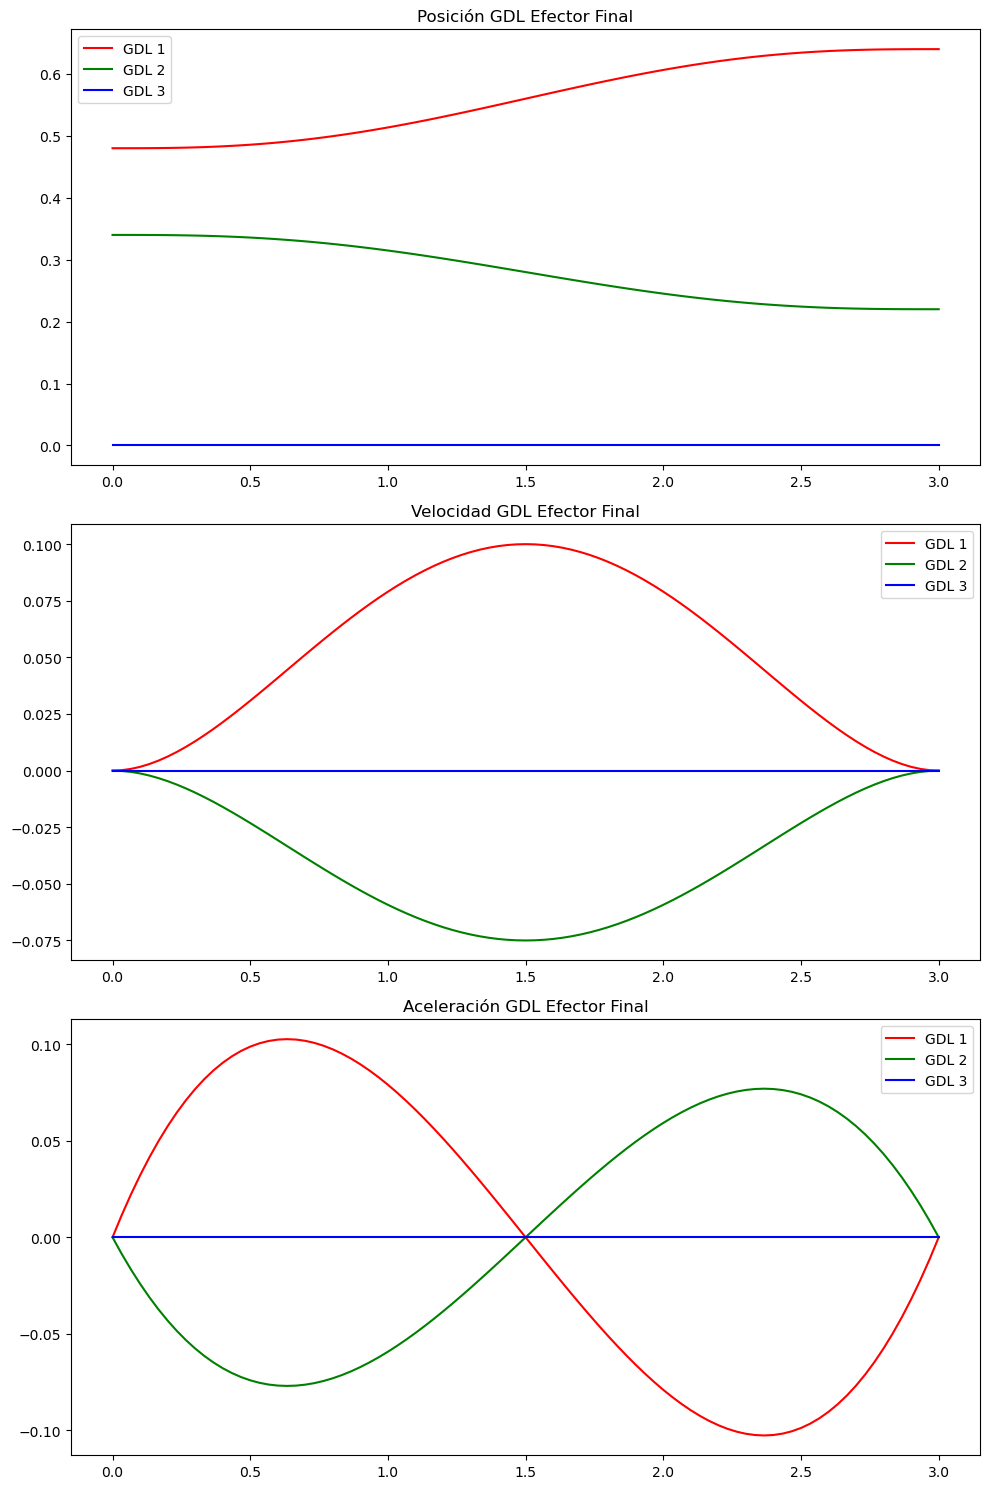

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, diff, Matrix, cos, sin, simplify

# Definir la función de transformación homogénea
def trans_homo(x, y, z, roll, pitch, yaw):
    # Matriz de rotación combinada
    R = Matrix([
        [cos(yaw)*cos(pitch), cos(yaw)*sin(pitch)*sin(roll) - sin(yaw)*cos(roll), cos(yaw)*sin(pitch)*cos(roll) + sin(yaw)*sin(roll)],
        [sin(yaw)*cos(pitch), sin(yaw)*sin(pitch)*sin(roll) + cos(yaw)*cos(roll), sin(yaw)*sin(pitch)*cos(roll) - cos(yaw)*sin(roll)],
        [-sin(pitch),         cos(pitch)*sin(roll),                            cos(pitch)*cos(roll)]
    ])
    
    # Matriz de transformación homogénea
    T = Matrix([
        [R[0,0], R[0,1], R[0,2], x],
        [R[1,0], R[1,1], R[1,2], y],
        [R[2,0], R[2,1], R[2,2], z],
        [0,      0,      0,      1]
    ])
    return T

# Definir la función para generar una trayectoria polinómica
def polinomial_trayectory_generator(frec=30, time=(0, 3), gdl_in=(0.8, 0.1, 0), gdl_fn=(0.4, 0.4, 0)):
    # Definir los símbolos para el polinomio
    a_0, a_1, a_2, a_3, a_4, a_5, t = symbols('a_0 a_1 a_2 a_3 a_4 a_5 t')
    
    # Definir el polinomio de quinto grado
    lam = a_0 + a_1 * t + a_2 * (t ** 2) + a_3 * (t ** 3) + a_4 * (t ** 4) + a_5 * (t ** 5)
    
    # Derivar para obtener velocidad y aceleración
    lam_dot = diff(lam, t)
    lam_dot_dot = diff(lam_dot, t)

    # Resolviendo los términos del polinomio con condiciones iniciales y finales
    terms = solve([
        lam.subs(t, time[0]) - gdl_in[0],
        lam.subs(t, time[1]) - gdl_fn[0],
        lam_dot.subs(t, time[0]) - 0,
        lam_dot.subs(t, time[1]) - 0,
        lam_dot_dot.subs(t, time[0]) - 0,
        lam_dot_dot.subs(t, time[1]) - 0
    ], [a_0, a_1, a_2, a_3, a_4, a_5], dict=True)

    # Lambda con valores sustituidos
    lam_s = lam.subs(terms[0])
    lam_s_dot = lam_dot.subs(terms[0])
    lam_s_dot_dot = lam_dot_dot.subs(terms[0])
    
    # Muestreo
    samples = int(frec * (time[1] - time[0]) + 1)
    dt = 1.0 / frec

    # Crear listas para almacenar resultados
    gdl = []
    gdl_dot = []
    gdl_dot_dot = []

    for a in range(samples):
        current_time = time[0] + float(a) / frec
        gdl.append(
            (gdl_in[0] + lam_s.subs(t, current_time) * (gdl_fn[0] - gdl_in[0]),
             gdl_in[1] + lam_s.subs(t, current_time) * (gdl_fn[1] - gdl_in[1]),
             gdl_in[2] + lam_s.subs(t, current_time) * (gdl_fn[2] - gdl_in[2]))
        )
        gdl_dot.append(
            (lam_s_dot.subs(t, current_time) * (gdl_fn[0] - gdl_in[0]),
             lam_s_dot.subs(t, current_time) * (gdl_fn[1] - gdl_in[1]),
             lam_s_dot.subs(t, current_time) * (gdl_fn[2] - gdl_in[2]))
        )
        gdl_dot_dot.append(
            (lam_s_dot_dot.subs(t, current_time) * (gdl_fn[0] - gdl_in[0]),
             lam_s_dot_dot.subs(t, current_time) * (gdl_fn[1] - gdl_in[1]),
             lam_s_dot_dot.subs(t, current_time) * (gdl_fn[2] - gdl_in[2]))
        )
    
    return gdl, gdl_dot, gdl_dot_dot

# Definir la función para graficar solo el efector final
def trayectory_graphics_efector_final(gdl, gdl_dot, gdl_dot_dot, frec):
    gdl_t = [float(i) / frec for i in range(len(gdl))]

    # Crear gráficos con subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    # Gráficas de Posición, Velocidad y Aceleración del Efector Final
    axes[0].set_title("Posición GDL Efector Final")
    axes[0].plot(gdl_t, [pos[0] for pos in gdl], color="red", label='GDL 1')
    axes[0].plot(gdl_t, [pos[1] for pos in gdl], color="green", label='GDL 2')
    axes[0].plot(gdl_t, [pos[2] for pos in gdl], color="blue", label='GDL 3')
    axes[0].legend()

    axes[1].set_title("Velocidad GDL Efector Final")
    axes[1].plot(gdl_t, [vel[0] for vel in gdl_dot], color="red", label='GDL 1')
    axes[1].plot(gdl_t, [vel[1] for vel in gdl_dot], color="green", label='GDL 2')
    axes[1].plot(gdl_t, [vel[2] for vel in gdl_dot], color="blue", label='GDL 3')
    axes[1].legend()

    axes[2].set_title("Aceleración GDL Efector Final")
    axes[2].plot(gdl_t, [acc[0] for acc in gdl_dot_dot], color="red", label='GDL 1')
    axes[2].plot(gdl_t, [acc[1] for acc in gdl_dot_dot], color="green", label='GDL 2')
    axes[2].plot(gdl_t, [acc[2] for acc in gdl_dot_dot], color="blue", label='GDL 3')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Generar la trayectoria y graficarla
frec = 30
time = (0, 3)
gdl_in = (0.8, 0.1, 0)
gdl_fn = (0.4, 0.4, 0)

# Generar la trayectoria
gdl, gdl_dot, gdl_dot_dot = polinomial_trayectory_generator(frec=frec, time=time, gdl_in=gdl_in, gdl_fn=gdl_fn)

# Graficar la trayectoria del efector final
trayectory_graphics_efector_final(gdl, gdl_dot, gdl_dot_dot, frec)


### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

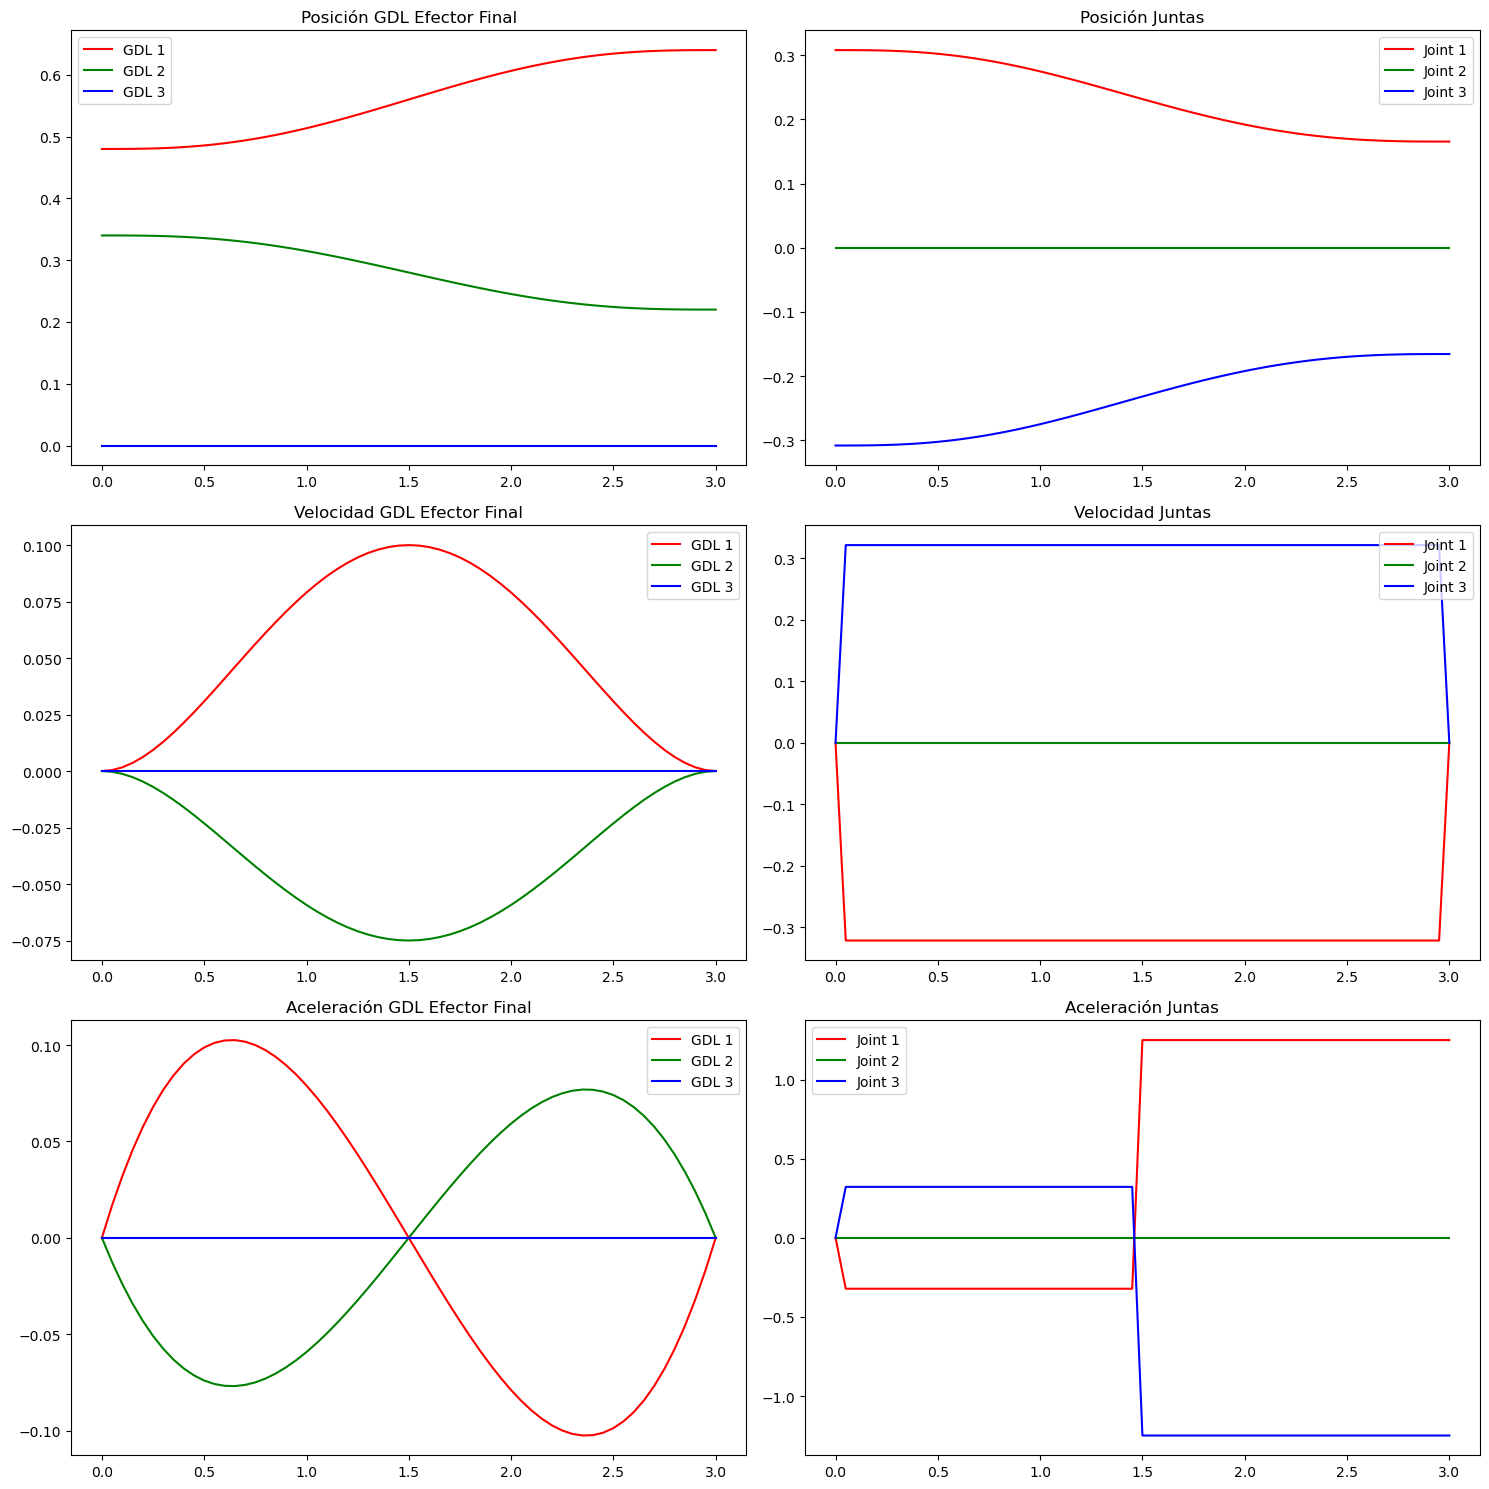

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, diff, Matrix, cos, sin, simplify

# Definir la función de transformación homogénea
def trans_homo(x, y, z, roll, pitch, yaw):
    # Matriz de rotación combinada
    R = Matrix([
        [cos(yaw)*cos(pitch), cos(yaw)*sin(pitch)*sin(roll) - sin(yaw)*cos(roll), cos(yaw)*sin(pitch)*cos(roll) + sin(yaw)*sin(roll)],
        [sin(yaw)*cos(pitch), sin(yaw)*sin(pitch)*sin(roll) + cos(yaw)*cos(roll), sin(yaw)*sin(pitch)*cos(roll) - cos(yaw)*sin(roll)],
        [-sin(pitch),         cos(pitch)*sin(roll),                            cos(pitch)*cos(roll)]
    ])
    
    # Matriz de transformación homogénea
    T = Matrix([
        [R[0,0], R[0,1], R[0,2], x],
        [R[1,0], R[1,1], R[1,2], y],
        [R[2,0], R[2,1], R[2,2], z],
        [0,      0,      0,      1]
    ])
    return T

# Definir la función para generar una trayectoria polinómica
def polinomial_trayectory_generator(frec=20, time=(0, 3), gdl_in=(0.8, 0.1, 0), gdl_fn=(0.4, 0.4, 0)):
    # Definir los símbolos para el polinomio
    a_0, a_1, a_2, a_3, a_4, a_5, t = symbols('a_0 a_1 a_2 a_3 a_4 a_5 t')
    
    # Definir el polinomio de quinto grado
    lam = a_0 + a_1 * t + a_2 * (t ** 2) + a_3 * (t ** 3) + a_4 * (t ** 4) + a_5 * (t ** 5)
    
    # Derivar para obtener velocidad y aceleración
    lam_dot = diff(lam, t)
    lam_dot_dot = diff(lam_dot, t)

    # Resolviendo los términos del polinomio con condiciones iniciales y finales
    terms = solve([
        lam.subs(t, time[0]) - gdl_in[0],
        lam.subs(t, time[1]) - gdl_fn[0],
        lam_dot.subs(t, time[0]) - 0,
        lam_dot.subs(t, time[1]) - 0,
        lam_dot_dot.subs(t, time[0]) - 0,
        lam_dot_dot.subs(t, time[1]) - 0
    ], [a_0, a_1, a_2, a_3, a_4, a_5], dict=True)

    # Lambda con valores sustituidos
    lam_s = lam.subs(terms[0])
    lam_s_dot = lam_dot.subs(terms[0])
    lam_s_dot_dot = lam_dot_dot.subs(terms[0])
    
    # Muestreo
    samples = int(frec * (time[1] - time[0]) + 1)
    dt = 1.0 / frec

    # Crear listas para almacenar resultados
    gdl = []
    gdl_dot = []
    gdl_dot_dot = []

    for a in range(samples):
        current_time = time[0] + float(a) / frec
        gdl.append(
            (gdl_in[0] + lam_s.subs(t, current_time) * (gdl_fn[0] - gdl_in[0]),
             gdl_in[1] + lam_s.subs(t, current_time) * (gdl_fn[1] - gdl_in[1]),
             gdl_in[2] + lam_s.subs(t, current_time) * (gdl_fn[2] - gdl_in[2]))
        )
        gdl_dot.append(
            (lam_s_dot.subs(t, current_time) * (gdl_fn[0] - gdl_in[0]),
             lam_s_dot.subs(t, current_time) * (gdl_fn[1] - gdl_in[1]),
             lam_s_dot.subs(t, current_time) * (gdl_fn[2] - gdl_in[2]))
        )
        gdl_dot_dot.append(
            (lam_s_dot_dot.subs(t, current_time) * (gdl_fn[0] - gdl_in[0]),
             lam_s_dot_dot.subs(t, current_time) * (gdl_fn[1] - gdl_in[1]),
             lam_s_dot_dot.subs(t, current_time) * (gdl_fn[2] - gdl_in[2]))
        )
    
    return gdl, gdl_dot, gdl_dot_dot

# Definir la función para la cinemática inversa
def inverse_kinematics(x, y, theta):
    # Asumiendo un modelo simple con tres articulaciones rotacionales
    # Esta función debería calcular los ángulos de las articulaciones dados x, y, y theta del efector final
    # Para este ejemplo, se utiliza una solución directa simplificada
    theta_1 = np.arctan2(y, x) / 2
    theta_2 = theta / 2
    theta_3 = theta - theta_1 - theta_2
    return theta_1, theta_2, theta_3

# Definir la función para obtener las posiciones, velocidades y aceleraciones de las juntas
def joint_trajectories(gdl, gdl_dot, gdl_dot_dot):
    joint_positions = []
    joint_velocities = []
    joint_accelerations = []

    for i in range(len(gdl)):
        x, y, theta = gdl[i]
        x_dot, y_dot, theta_dot = gdl_dot[i]
        x_ddot, y_ddot, theta_ddot = gdl_dot_dot[i]

        # Cinemática inversa para obtener las posiciones de las juntas
        joint_pos = inverse_kinematics(float(x), float(y), float(theta))
        joint_positions.append(joint_pos)

        # Derivar para obtener las velocidades y aceleraciones de las juntas
        joint_vel = inverse_kinematics(float(x_dot), float(y_dot), float(theta_dot))
        joint_acc = inverse_kinematics(float(x_ddot), float(y_ddot), float(theta_ddot))

        joint_velocities.append(joint_vel)
        joint_accelerations.append(joint_acc)

    return joint_positions, joint_velocities, joint_accelerations

# Definir la función para graficar los resultados
def trayectory_graphics(gdl, gdl_dot, gdl_dot_dot, joint_positions, joint_velocities, joint_accelerations, frec):
    gdl_t = [float(i) / frec for i in range(len(gdl))]

    # Crear gráficos con subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

    # Gráficas de Posición, Velocidad y Aceleración del Efector Final
    axes[0, 0].set_title("Posición GDL Efector Final")
    axes[0, 0].plot(gdl_t, [pos[0] for pos in gdl], color="red", label='GDL 1')
    axes[0, 0].plot(gdl_t, [pos[1] for pos in gdl], color="green", label='GDL 2')
    axes[0, 0].plot(gdl_t, [pos[2] for pos in gdl], color="blue", label='GDL 3')
    axes[0, 0].legend()

    axes[1, 0].set_title("Velocidad GDL Efector Final")
    axes[1, 0].plot(gdl_t, [vel[0] for vel in gdl_dot], color="red", label='GDL 1')
    axes[1, 0].plot(gdl_t, [vel[1] for vel in gdl_dot], color="green", label='GDL 2')
    axes[1, 0].plot(gdl_t, [vel[2] for vel in gdl_dot], color="blue", label='GDL 3')
    axes[1, 0].legend()

    axes[2, 0].set_title("Aceleración GDL Efector Final")
    axes[2, 0].plot(gdl_t, [acc[0] for acc in gdl_dot_dot], color="red", label='GDL 1')
    axes[2, 0].plot(gdl_t, [acc[1] for acc in gdl_dot_dot], color="green", label='GDL 2')
    axes[2, 0].plot(gdl_t, [acc[2] for acc in gdl_dot_dot], color="blue", label='GDL 3')
    axes[2, 0].legend()

    # Gráficas de Posición, Velocidad y Aceleración de las Juntas
    axes[0, 1].set_title("Posición Juntas")
    axes[0, 1].plot(gdl_t, [pos[0] for pos in joint_positions], color="red", label='Joint 1')
    axes[0, 1].plot(gdl_t, [pos[1] for pos in joint_positions], color="green", label='Joint 2')
    axes[0, 1].plot(gdl_t, [pos[2] for pos in joint_positions], color="blue", label='Joint 3')
    axes[0, 1].legend()

    axes[1, 1].set_title("Velocidad Juntas")
    axes[1, 1].plot(gdl_t, [vel[0] for vel in joint_velocities], color="red", label='Joint 1')
    axes[1, 1].plot(gdl_t, [vel[1] for vel in joint_velocities], color="green", label='Joint 2')
    axes[1, 1].plot(gdl_t, [vel[2] for vel in joint_velocities], color="blue", label='Joint 3')
    axes[1, 1].legend()

    axes[2, 1].set_title("Aceleración Juntas")
    axes[2, 1].plot(gdl_t, [acc[0] for acc in joint_accelerations], color="red", label='Joint 1')
    axes[2, 1].plot(gdl_t, [acc[1] for acc in joint_accelerations], color="green", label='Joint 2')
    axes[2, 1].plot(gdl_t, [acc[2] for acc in joint_accelerations], color="blue", label='Joint 3')
    axes[2, 1].legend()

    plt.tight_layout()
    plt.show()

# Generar la trayectoria y graficarla
frec = 20
time = (0, 3)
gdl_in = (0.8, 0.1, 0)
gdl_fn = (0.4, 0.4, 0)

# Generar la trayectoria
gdl, gdl_dot, gdl_dot_dot = polinomial_trayectory_generator(frec=frec, time=time, gdl_in=gdl_in, gdl_fn=gdl_fn)

# Obtener las posiciones, velocidades y aceleraciones de las juntas
joint_positions, joint_velocities, joint_accelerations = joint_trajectories(gdl, gdl_dot, gdl_dot_dot)

# Graficar la trayectoria
trayectory_graphics(gdl, gdl_dot, gdl_dot_dot, joint_positions, joint_velocities, joint_accelerations, frec)


### 5. Github
Para terminar, crear un repositorio en línea en gihub, donde se subirán los archivos de la práctica. 
Se recomienda primero crear el repositorio en línea, clonarlo en el ordenador y después incluir los archivos de la práctica. 
Para utilizar el repositorio para todas las prácticas posteriores, se recomienda usar la siguiente estructura de archivos:
~~~ bash
repositorio_practicas/
├── practica_2
│   ├── imagenes
│   │   └── P2_IM1.png
│   └── Practica_2.ipynb
└── README.md
~~~
Dentro del archivo README.md (Creado de forma automática en el repositorio en línea), colocar los nombres de los integrantes del equipo.

## Análisis de resultados

¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> El modelo de cinemática inversa de un robot es esencial porque permite calcular las posiciones angulares (o desplazamientos) de cada una de las articulaciones necesarias para que el extremo del robot (o su "efector final") alcance una posición y orientación deseada en el espacio. Esto permite controlar y programar robots para que realicen tareas complejas y precisas

¿Controlar las condiciones iniciales y finales de la trayectoria del efector final tiene un efecto en las condiciones inicial y final de las juntas?
>Las condiciones iniciales y finales de la trayectoria del efector final afectan directamente las condiciones de posición, velocidad y aceleración de las juntas. Esto implica que, al definir la trayectoria del efector, también estamos especificando las condiciones de operación de cada articulación, lo cual es clave para que el robot siga la trayectoria de manera precisa y eficiente

¿Qué utilidad tiene el uso de un repositorio en línea para código?
> La accesibilidad mejora significativamente, ya que el código está disponible en línea y puede consultarse desde cualquier lugar con conexión a internet. Además, el repositorio permite organizar el proyecto de forma más eficiente y proporciona un respaldo seguro en caso de pérdida de datos. Al estar en un entorno compartido, facilita la colaboración con otros, permitiendo que varias personas trabajen en el mismo proyecto y realicen aportes en tiempo real. También es posible subir versiones actualizadas del repositorio, manteniendo el código sincronizado con los cambios más recientes y asegurando que todos los colaboradores trabajen con la última versión.




## Conclusiones

En conclusión, el proyecto alcanzó satisfactoriamente sus objetivos al adaptar un formato previo en URDF para interpretar, modificar y graficar trayectorias de un robot en Jupyter Notebook. Para esto, se aplicaron conceptos de cinemática directa e inversa: la cinemática directa fue esencial para calcular la posición y orientación del efector final en función de las configuraciones de sus articulaciones, mientras que la cinemática inversa permitió determinar las posiciones y velocidades necesarias de cada junta para que el robot alcanzara una posición final específica. Esto permitió calcular y graficar de forma precisa la trayectoria desde la posición inicial hasta la posición final, incluyendo la velocidad y aceleración en cada punto.

Además, el uso de un repositorio en GitHub facilitó el respaldo y actualización, asegurando un control de versiones. Se organizaron secciones como la de imágenes, mejorando la estructura del archivo y permitiendo un acceso claro a la documentación. Esta integración de herramientas y conceptos logro una organización de los resultados obtenidos.


## Bibliografía 
“Robótica - Cinemática Inversa I”. Google Sites: Sign-in. Accedido el 11 de noviembre de 2024. [En línea]. Disponible: https://sites.google.com/site/proyectosroboticos/cinematica-inversa-i
“Qué es Git | Atlassian Git Tutorial”. Atlassian. Accedido el 11 de noviembre de 2024. [En línea]. Disponible: https://www.atlassian.com/es/git/tutorials/what-is-git
“Qué es Git | Atlassian Git Tutorial”. Atlassian. Accedido el 11 de noviembre de 2024. [En línea]. Disponible: https://www.atlassian.com/es/git/tutorials/what-is-git
“Acerca de GitHub y Git - Documentación de GitHub”. GitHub Docs. Accedido el 11 de noviembre de 2024. [En línea]. Disponible: https://docs.github.com/es/get-started/start-your-journey/about-github-and-git

